In [145]:
def predict_ANC_dropout_with_weights(risk_factors):
    # Unpacking input values
    curr_age_group = risk_factors["CurrAgeGroup"]
    place_of_residence = risk_factors["Place_of_Residence"]
    education_level = risk_factors["Education_level"]
    head_age = risk_factors["Head_age"]
    wealth_index = risk_factors["Wealth_index"]
    religion = risk_factors["Religion"]
    marital_status = risk_factors["Current_marital_status"]
    distance_to_health = risk_factors["Distance_to_health"]
    media_use = risk_factors["Frequency_media_use"]
    internet_use = risk_factors["Frequency_of_using_internet"]
    antenatal_visits = risk_factors["Antenatal_visits"]
    postnatal_visits = risk_factors["Postnatal_visits"]

    # Define weights for each variable's impact on risk
    weights = {
        "CurrAgeGroup": 2,  # Age-related risk
        "Place_of_Residence": 1,  # Rural area risk
        "Education_level": 3,  # Education has a strong effect on risk
        "Head_age": 1,  # Household head age
        "Wealth_index": 5,  # Wealth has a strong effect on healthcare access
        "Distance_to_health": 4,  # Distance is a major access barrier
        "Media_use": 1,  # Media exposure has a smaller effect
        "Marital_status": 2,  # Marital status has a moderate effect
        "Internet_use": 2,  # Access to internet has a moderate effect
        "Antenatal_visits": 6,  # Missing ANC visits is a major risk
        "Postnatal_visits": 4,  # Missing PNC visits is a major risk
    }

    total_weight = 0
    risk_weight = 0

    # Check for each variable and add to the total risk weight
    if curr_age_group in [1, 7]:  # Age 15-19 or 45-49
        risk_weight += weights["CurrAgeGroup"]
        total_weight += weights["CurrAgeGroup"]

    if place_of_residence == 2:  # Rural
        risk_weight += weights["Place_of_Residence"]
        total_weight += weights["Place_of_Residence"]

    if education_level in [0, 1]:  # No education or Primary education
        risk_weight += weights["Education_level"]
        total_weight += weights["Education_level"]

    if wealth_index <= 2:  # Poorest or Poorer
        risk_weight += weights["Wealth_index"]
        total_weight += weights["Wealth_index"]

    if distance_to_health == 1:  # Big Problem
        risk_weight += weights["Distance_to_health"]
        total_weight += weights["Distance_to_health"]

    if media_use in [0, 1]:  # Low exposure to media
        risk_weight += weights["Media_use"]
        total_weight += weights["Media_use"]

    if internet_use == 0:  # Never use internet
        risk_weight += weights["Internet_use"]
        total_weight += weights["Internet_use"]

    if marital_status in [0, 4, 5]:  # Never in union, Divorced, Separated
        risk_weight += weights["Marital_status"]
        total_weight += weights["Marital_status"]

    if head_age < 25 or head_age > 50:
        risk_weight += weights["Head_age"]
        total_weight += weights["Head_age"]

    if antenatal_visits < 8:  # If less than 8 ANC visits
        risk_weight += weights["Antenatal_visits"]
        total_weight += weights["Antenatal_visits"]

    if postnatal_visits < 6:  # If less than 6 PNC visits
        risk_weight += weights["Postnatal_visits"]
        total_weight += weights["Postnatal_visits"]

    # Calculate the risk ratio and decide on the risk level
    risk_ratio = risk_weight / total_weight

    # Define threshold to classify as High Risk or Low Risk
    if risk_ratio > 0.5:
        return "High Risk"
    else:
        return "Low Risk"

In [146]:
# Example of usage with corrected key for marital status
risk_factors = {
    "CurrAgeGroup": 3,  # Age 25-29 (low risk)
    "Place_of_Residence": 1,  # Urban (low risk)
    "Education_level": 3,  # Higher education (low risk)
    "Head_age": 40,  # Stable head age (low risk)
    "Wealth_index": 5,  # Richest (low risk)
    "Religion": 2,  # Protestant (neutral)
    "marital_status": 1,  # Married (low risk)
    "Distance_to_health": 2,  # Not a big problem (low risk)
    "Frequency_media_use": 2,  # At least once a week (low risk)
    "Frequency_of_using_internet": 1,  # Yes (low risk)
    "Antenatal_visits": 9,  # More than 8 ANC visits (low risk)
    "Postnatal_visits": 6,  # More than 6 PNC visits (low risk)
}

# Get the ANC dropout risk
risk_level = predict_ANC_dropout_with_weights(risk_factors)
print(f"The predicted ANC dropout risk is: {risk_level}")

KeyError: 'Current_marital_status'

In [158]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
CurrAgeGroup = ctrl.Antecedent(np.arange(0, 50, 1), 'CurrAgeGroup')
Place_of_Residence = ctrl.Antecedent(np.arange(1, 3, 1), 'Place_of_Residence')
Education_level = ctrl.Antecedent(np.arange(0, 4, 1), 'Education_level')
Wealth_index = ctrl.Antecedent(np.arange(1, 6, 1), 'Wealth_index')
marital_status = ctrl.Antecedent(np.arange(0, 6, 1), 'marital_status')
Distance_to_health = ctrl.Antecedent(np.arange(1, 4, 1), 'Distance_to_health')  # More granular categories
Frequency_media_use = ctrl.Antecedent(np.arange(0, 4, 1), 'Frequency_media_use')  # More granular categories
Frequency_of_using_internet = ctrl.Antecedent(np.arange(0, 4, 1), 'Frequency_of_using_internet')  # More granular categories
Antenatal_visits = ctrl.Antecedent(np.arange(0, 15, 1), 'Antenatal_visits')
Postnatal_visits = ctrl.Antecedent(np.arange(0, 15, 1), 'Postnatal_visits')

# Define the 'risk' fuzzy variable
risk = ctrl.Consequent(np.arange(0, 11, 1), 'Risk')

# Age fuzzy sets
CurrAgeGroup['Young'] = fuzz.trimf(CurrAgeGroup.universe, [0, 0, 25])
CurrAgeGroup['Middle-aged'] = fuzz.trimf(CurrAgeGroup.universe, [20, 30, 40])
CurrAgeGroup['Old'] = fuzz.trimf(CurrAgeGroup.universe, [30, 50, 50])

# Place of Residence fuzzy sets
Place_of_Residence['Urban'] = fuzz.trimf(Place_of_Residence.universe, [1, 1, 2])
Place_of_Residence['Rural'] = fuzz.trimf(Place_of_Residence.universe, [1, 2, 2])

# Education level fuzzy sets
Education_level['Low'] = fuzz.trimf(Education_level.universe, [0, 0, 1])
Education_level['Medium'] = fuzz.trimf(Education_level.universe, [1, 2, 2])
Education_level['High'] = fuzz.trimf(Education_level.universe, [2, 3, 3])

# Wealth index fuzzy sets
Wealth_index['Poor'] = fuzz.trimf(Wealth_index.universe, [1, 1, 3])
Wealth_index['Middle'] = fuzz.trimf(Wealth_index.universe, [2, 3, 4])
Wealth_index['Rich'] = fuzz.trimf(Wealth_index.universe, [3, 5, 5])

# Marital status fuzzy sets
marital_status['Single'] = fuzz.trimf(marital_status.universe, [0, 0, 1])
marital_status['Married'] = fuzz.trimf(marital_status.universe, [1, 1, 2])
marital_status['Living with partner'] = fuzz.trimf(marital_status.universe, [1, 2, 2])
marital_status['Divorced'] = fuzz.trimf(marital_status.universe, [3, 4, 5])
marital_status['Widowed'] = fuzz.trimf(marital_status.universe, [4, 5, 5])

# Distance to health fuzzy sets (more granular)
Distance_to_health['Very Far'] = fuzz.trimf(Distance_to_health.universe, [1, 2, 3])
Distance_to_health['Far'] = fuzz.trimf(Distance_to_health.universe, [1, 1, 2])
Distance_to_health['Close'] = fuzz.trimf(Distance_to_health.universe, [2, 2, 3])

# Frequency of media use fuzzy sets (more granular)
Frequency_media_use['Low'] = fuzz.trimf(Frequency_media_use.universe, [0, 0, 1])
Frequency_media_use['Medium'] = fuzz.trimf(Frequency_media_use.universe, [1, 2, 2])
Frequency_media_use['High'] = fuzz.trimf(Frequency_media_use.universe, [2, 3, 3])

# Frequency of using internet fuzzy sets (more granular)
Frequency_of_using_internet['Never'] = fuzz.trimf(Frequency_of_using_internet.universe, [0, 0, 1])
Frequency_of_using_internet['Occasional'] = fuzz.trimf(Frequency_of_using_internet.universe, [1, 2, 2])
Frequency_of_using_internet['Regular'] = fuzz.trimf(Frequency_of_using_internet.universe, [2, 3, 3])

# Antenatal visits fuzzy sets
Antenatal_visits['Low'] = fuzz.trimf(Antenatal_visits.universe, [0, 0, 5])
Antenatal_visits['Medium'] = fuzz.trimf(Antenatal_visits.universe, [5, 6, 8])
Antenatal_visits['High'] = fuzz.trimf(Antenatal_visits.universe, [8, 12, 12])

# Postnatal visits fuzzy sets
Postnatal_visits['Low'] = fuzz.trimf(Postnatal_visits.universe, [0, 0, 3])
Postnatal_visits['Medium'] = fuzz.trimf(Postnatal_visits.universe, [3, 4, 6])
Postnatal_visits['High'] = fuzz.trimf(Postnatal_visits.universe, [6, 8, 10])

# Risk fuzzy sets
risk['Low'] = fuzz.trimf(risk.universe, [0, 0, 5])
risk['High'] = fuzz.trimf(risk.universe, [5, 10, 10])

# Define fuzzy rules for Low and High risk only

# Age & Education Rules
rule1 = ctrl.Rule(CurrAgeGroup['Young'] & Education_level['Low'], risk['High'])
rule2 = ctrl.Rule(CurrAgeGroup['Young'] & Education_level['Medium'], risk['High'])
rule3 = ctrl.Rule(CurrAgeGroup['Young'] & Education_level['High'], risk['Low'])
rule4 = ctrl.Rule(CurrAgeGroup['Middle-aged'] & Education_level['Low'], risk['High'])
rule5 = ctrl.Rule(CurrAgeGroup['Middle-aged'] & Education_level['Medium'], risk['High'])
rule6 = ctrl.Rule(CurrAgeGroup['Middle-aged'] & Education_level['High'], risk['Low'])
rule7 = ctrl.Rule(CurrAgeGroup['Old'] & Education_level['Low'], risk['High'])
rule8 = ctrl.Rule(CurrAgeGroup['Old'] & Education_level['Medium'], risk['High'])
rule9 = ctrl.Rule(CurrAgeGroup['Old'] & Education_level['High'], risk['Low'])

# Wealth & Distance to Health Rules
rule10 = ctrl.Rule(Wealth_index['Poor'] & Distance_to_health['Very Far'], risk['High'])
rule11 = ctrl.Rule(Wealth_index['Poor'] & Distance_to_health['Far'], risk['High'])
rule12 = ctrl.Rule(Wealth_index['Poor'] & Distance_to_health['Close'], risk['High'])
rule13 = ctrl.Rule(Wealth_index['Middle'] & Distance_to_health['Very Far'], risk['High'])
rule14 = ctrl.Rule(Wealth_index['Middle'] & Distance_to_health['Far'], risk['High'])
rule15 = ctrl.Rule(Wealth_index['Middle'] & Distance_to_health['Close'], risk['Low'])
rule16 = ctrl.Rule(Wealth_index['Rich'] & Distance_to_health['Very Far'], risk['High'])
rule17 = ctrl.Rule(Wealth_index['Rich'] & Distance_to_health['Far'], risk['Low'])
rule18 = ctrl.Rule(Wealth_index['Rich'] & Distance_to_health['Close'], risk['Low'])

# Marital Status & Education Rules
rule19 = ctrl.Rule(marital_status['Single'] & Education_level['Low'], risk['High'])
rule20 = ctrl.Rule(marital_status['Single'] & Education_level['Medium'], risk['High'])
rule21 = ctrl.Rule(marital_status['Single'] & Education_level['High'], risk['Low'])
rule22 = ctrl.Rule(marital_status['Married'] & Education_level['Low'], risk['High'])
rule23 = ctrl.Rule(marital_status['Married'] & Education_level['Medium'], risk['High'])
rule24 = ctrl.Rule(marital_status['Married'] & Education_level['High'], risk['Low'])
rule25 = ctrl.Rule(marital_status['Divorced'] & Education_level['Low'], risk['High'])
rule26 = ctrl.Rule(marital_status['Divorced'] & Education_level['Medium'], risk['High'])
rule27 = ctrl.Rule(marital_status['Divorced'] & Education_level['High'], risk['Low'])
rule28 = ctrl.Rule(marital_status['Widowed'] & Education_level['Low'], risk['High'])
rule29 = ctrl.Rule(marital_status['Widowed'] & Education_level['Medium'], risk['High'])
rule30 = ctrl.Rule(marital_status['Widowed'] & Education_level['High'], risk['Low'])

# Antenatal & Postnatal Visits Rules
rule31 = ctrl.Rule(Antenatal_visits['Low'], risk['High'])
rule32 = ctrl.Rule(Antenatal_visits['Medium'], risk['High'])
rule33 = ctrl.Rule(Antenatal_visits['High'], risk['Low'])
rule34 = ctrl.Rule(Postnatal_visits['Low'], risk['High'])
rule35 = ctrl.Rule(Postnatal_visits['Medium'], risk['High'])
rule36 = ctrl.Rule(Postnatal_visits['High'], risk['Low'])

# Media Use & Wealth Rules
rule37 = ctrl.Rule(Frequency_media_use['Low'] & Wealth_index['Poor'], risk['High'])
rule38 = ctrl.Rule(Frequency_media_use['Low'] & Wealth_index['Middle'], risk['High'])
rule39 = ctrl.Rule(Frequency_media_use['Low'] & Wealth_index['Rich'], risk['Low'])
rule40 = ctrl.Rule(Frequency_media_use['Medium'] & Wealth_index['Poor'], risk['High'])
rule41 = ctrl.Rule(Frequency_media_use['Medium'] & Wealth_index['Middle'], risk['High'])
rule42 = ctrl.Rule(Frequency_media_use['Medium'] & Wealth_index['Rich'], risk['Low'])
rule43 = ctrl.Rule(Frequency_media_use['High'] & Wealth_index['Poor'], risk['High'])
rule44 = ctrl.Rule(Frequency_media_use['High'] & Wealth_index['Middle'], risk['Low'])
rule45 = ctrl.Rule(Frequency_media_use['High'] & Wealth_index['Rich'], risk['Low'])

# Internet Use & Distance to Health Rules
rule46 = ctrl.Rule(Frequency_of_using_internet['Never'] & Distance_to_health['Very Far'], risk['High'])
rule47 = ctrl.Rule(Frequency_of_using_internet['Never'] & Distance_to_health['Far'], risk['High'])
rule48 = ctrl.Rule(Frequency_of_using_internet['Never'] & Distance_to_health['Close'], risk['High'])
rule49 = ctrl.Rule(Frequency_of_using_internet['Occasional'] & Distance_to_health['Very Far'], risk['High'])
rule50 = ctrl.Rule(Frequency_of_using_internet['Occasional'] & Distance_to_health['Far'], risk['High'])
rule51 = ctrl.Rule(Frequency_of_using_internet['Occasional'] & Distance_to_health['Close'], risk['High'])
rule52 = ctrl.Rule(Frequency_of_using_internet['Regular'] & Distance_to_health['Very Far'], risk['High'])
rule53 = ctrl.Rule(Frequency_of_using_internet['Regular'] & Distance_to_health['Far'], risk['Low'])
rule54 = ctrl.Rule(Frequency_of_using_internet['Regular'] & Distance_to_health['Close'], risk['Low'])

# Place of Residence & Education Rules
rule55 = ctrl.Rule(Place_of_Residence['Urban'] & Education_level['Low'], risk['High'])
rule56 = ctrl.Rule(Place_of_Residence['Urban'] & Education_level['Medium'], risk['High'])
rule57 = ctrl.Rule(Place_of_Residence['Urban'] & Education_level['High'], risk['Low'])
rule58 = ctrl.Rule(Place_of_Residence['Rural'] & Education_level['Low'], risk['High'])
rule59 = ctrl.Rule(Place_of_Residence['Rural'] & Education_level['Medium'], risk['High'])
rule60 = ctrl.Rule(Place_of_Residence['Rural'] & Education_level['High'], risk['Low'])  # Higher risk in rural areas with high education

# Control system and simulation
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13,
                               rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, 
                               rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, 
                               rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44, rule45, rule46, 
                               rule47, rule48, rule49, rule50, rule51, rule52, rule53, rule54, rule55, rule56, rule57, 
                               rule58, rule59, rule60])

risk_prediction = ctrl.ControlSystemSimulation(risk_ctrl)

print("Fuzzy system setup completed successfully.")



    

ImportError: cannot import name 'control' from 'skfuzzy' (/usr/lib/python3.12/site-packages/skfuzzy/__init__.py)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Define survey questions and response categories
survey_questions = {
    "What is your age group?": ["18-25", "26-35", "36-45", "46-55", "56+"],
    "What is your region of residence?": ["Urban", "Rural"],
    "What is your place of residence?": ["City", "Town", "Village"],
    "What is your highest level of education?": ["No formal education", "Primary", "Secondary", "Tertiary"],
    "What is your gender?": ["Male", "Female", "Other"],
    "What is your age?": ["Below 20", "21-30", "31-40", "41-50", "Above 50"],
    "What is your wealth index?": ["Low", "Middle", "High"],
    "What is your religion?": ["Christian", "Muslim", "Hindu", "Other"],
    "What is your marital status?": ["Single", "Married", "Divorced", "Widowed"],
    "How far is the nearest healthcare facility from your residence?": ["<1 km", "1-5 km", "6-10 km", "Above 10 km"],
    "How frequently do you listen to the radio?": ["Daily", "Weekly", "Rarely", "Never"],
    "How often do you use the internet?": ["Daily", "Weekly", "Rarely", "Never"],
    "How frequently do you watch television?": ["Daily", "Weekly", "Rarely", "Never"],
    "How many antenatal care (ANC) visits did you attend during your last pregnancy?": ["None", "1-2", "3-4", "5+"],
    "How many postnatal care (PNC) visits did you attend?": ["None", "1-2", "3-4", "5+"],
}

# Generate synthetic response counts
np.random.seed(42)
response_counts = {question: np.random.randint(10, 100, len(options)) for question, options in survey_questions.items()}

# Create directory to store images
output_dir = "survey_visualizations"
os.makedirs(output_dir, exist_ok=True)

# Generate and save pie charts
for question, options in survey_questions.items():
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.pie(response_counts[question], labels=options, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax.set_title(question, fontsize=12)

    # Save the image
    image_path = f"{output_dir}/{question.replace(' ', '_')}.png"
    plt.savefig(image_path)
    plt.close(fig)

print(f"Survey visualizations saved in '{output_dir}' folder.")


Survey visualizations saved in 'survey_visualizations' folder.


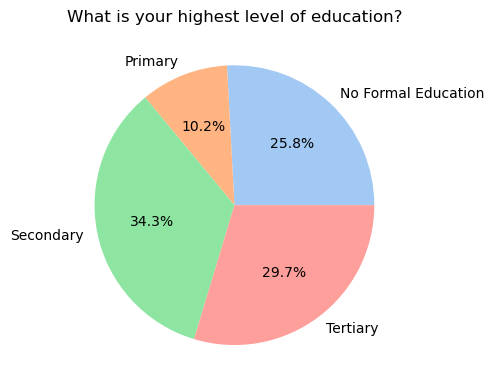

/tmp/ipykernel_12314/2597847148.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=data, ax=ax, palette="viridis")
/tmp/ipykernel_12314/2597847148.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=30, ha="right")


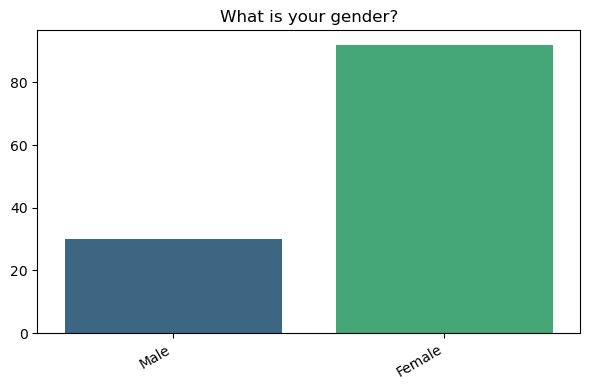

/tmp/ipykernel_12314/2597847148.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=categories, x=data, ax=ax, palette="coolwarm")


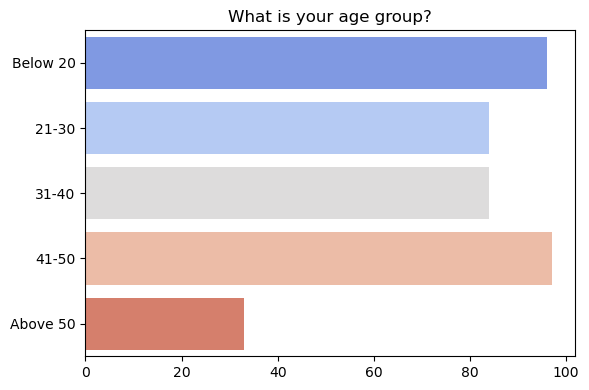

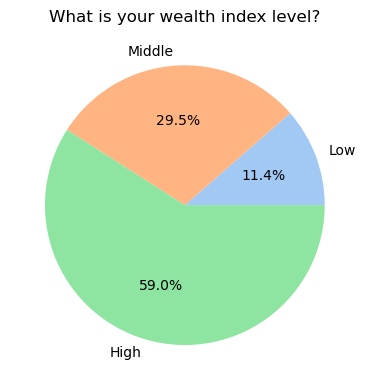

/tmp/ipykernel_12314/2597847148.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=data, ax=ax, palette="viridis")
/tmp/ipykernel_12314/2597847148.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=30, ha="right")


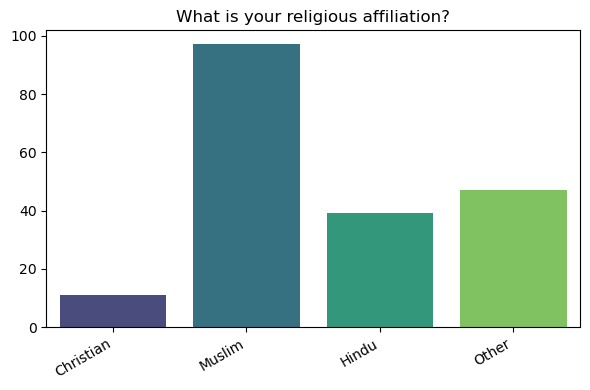

/tmp/ipykernel_12314/2597847148.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=categories, x=data, ax=ax, palette="coolwarm")


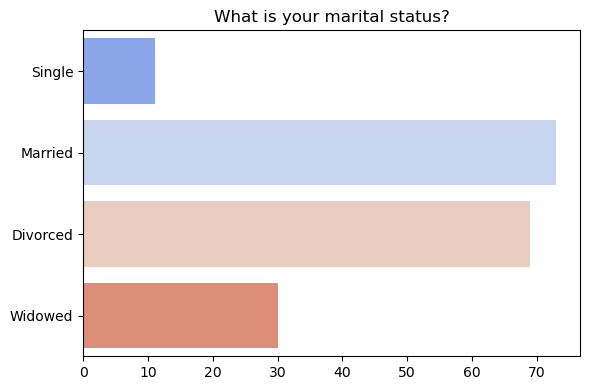

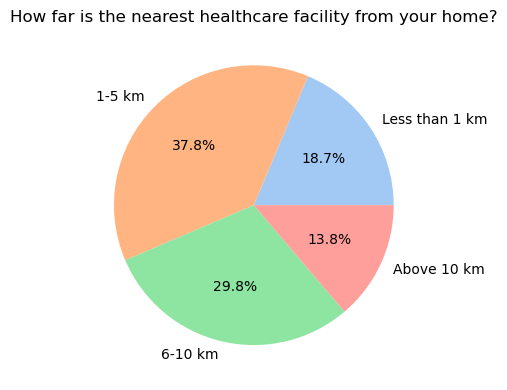

/tmp/ipykernel_12314/2597847148.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=data, ax=ax, palette="viridis")
/tmp/ipykernel_12314/2597847148.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=30, ha="right")


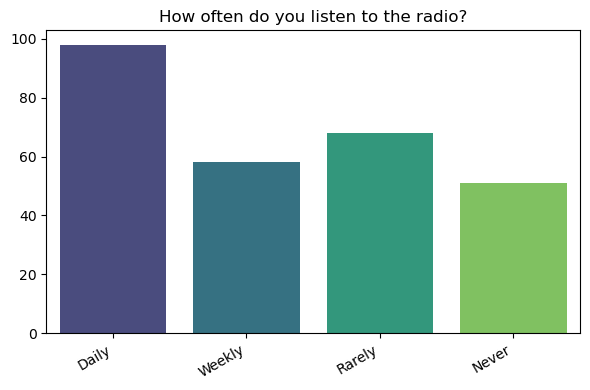

/tmp/ipykernel_12314/2597847148.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=categories, x=data, ax=ax, palette="coolwarm")


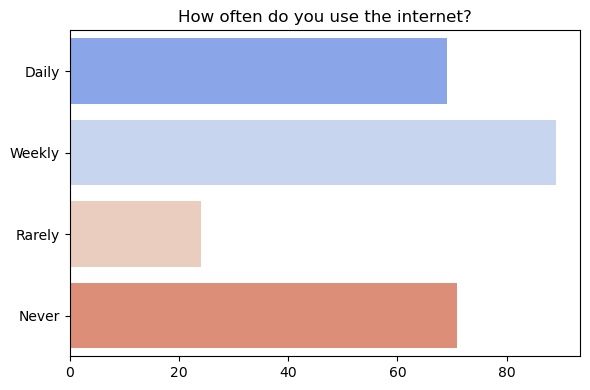

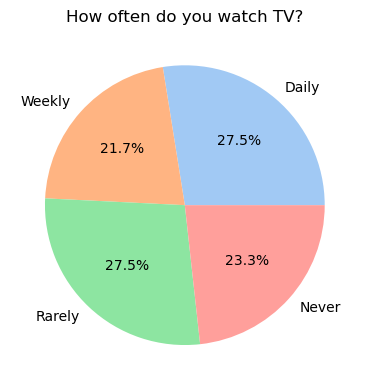

/tmp/ipykernel_12314/2597847148.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=data, ax=ax, palette="viridis")
/tmp/ipykernel_12314/2597847148.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, rotation=30, ha="right")


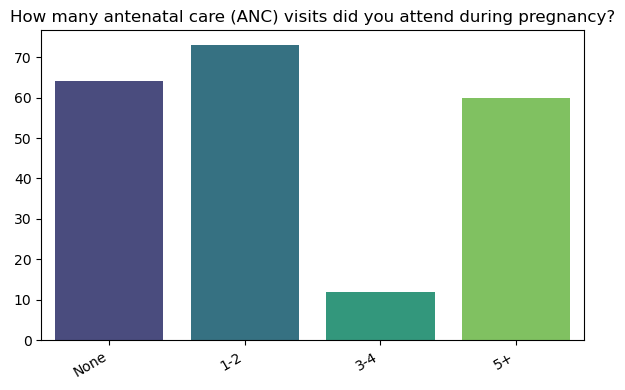

/tmp/ipykernel_12314/2597847148.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=categories, x=data, ax=ax, palette="coolwarm")


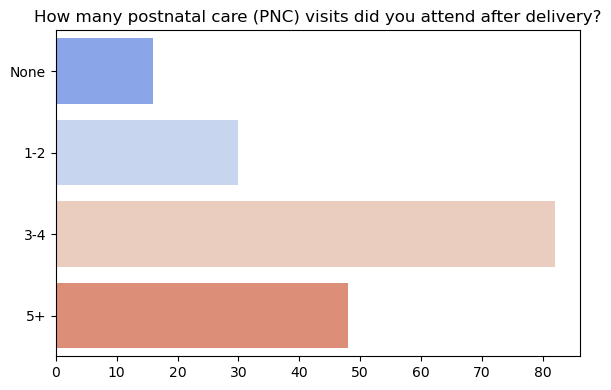

In [7]:
# Re-import necessary libraries after execution state reset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Re-define the survey questions with their response categories
survey_data = {
    "What is your highest level of education?": ["No Formal Education", "Primary", "Secondary", "Tertiary"],
    "What is your gender?": ["Male", "Female"],
    "What is your age group?": ["Below 20", "21-30", "31-40", "41-50", "Above 50"],
    "What is your wealth index level?": ["Low", "Middle", "High"],
    "What is your religious affiliation?": ["Christian", "Muslim", "Hindu", "Other"],
    "What is your marital status?": ["Single", "Married", "Divorced", "Widowed"],
    "How far is the nearest healthcare facility from your home?": ["Less than 1 km", "1-5 km", "6-10 km", "Above 10 km"],
    "How often do you listen to the radio?": ["Daily", "Weekly", "Rarely", "Never"],
    "How often do you use the internet?": ["Daily", "Weekly", "Rarely", "Never"],
    "How often do you watch TV?": ["Daily", "Weekly", "Rarely", "Never"],
    "How many antenatal care (ANC) visits did you attend during pregnancy?": ["None", "1-2", "3-4", "5+"],
    "How many postnatal care (PNC) visits did you attend after delivery?": ["None", "1-2", "3-4", "5+"],
}

# Generate random response counts for each category
np.random.seed(42)
response_counts = {question: np.random.randint(10, 100, len(options)) for question, options in survey_data.items()}

# Generate and display each chart individually
for idx, (question, categories) in enumerate(survey_data.items()):
    data = response_counts[question]
    
    fig, ax = plt.subplots(figsize=(6, 4))
    
    if idx % 3 == 0:
        # Pie chart
        ax.pie(data, labels=categories, autopct='%1.1f%%', colors=sns.color_palette("pastel", len(categories)))
        ax.set_title(question, fontsize=12)
    elif idx % 3 == 1:
        # Vertical bar chart
        sns.barplot(x=categories, y=data, ax=ax, palette="viridis")
        ax.set_xticklabels(categories, rotation=30, ha="right")
        ax.set_title(question, fontsize=12)
    else:
        # Horizontal bar chart
        sns.barplot(y=categories, x=data, ax=ax, palette="coolwarm")
        ax.set_title(question, fontsize=12)

    plt.tight_layout()
    plt.show()


In [3]:
from graphviz import Digraph

# Generate Level 1 Data Flow Diagram (DFD)
dfd = Digraph("DFD_Level1", format="png")

# External entities
dfd.node("User", "Healthcare Provider", shape="parallelogram")
dfd.node("Admin", "System Administrator", shape="parallelogram")

# Processes
dfd.node("P1", "Data Collection & Input", shape="ellipse")
dfd.node("P2", "Maternal Health Risk Prediction", shape="ellipse")
dfd.node("P3", "Alerts & Notifications", shape="ellipse")
dfd.node("P4", "Reporting & Visualization", shape="ellipse")

# Data stores
dfd.node("D1", "Patient Database", shape="cylinder")
dfd.node("D2", "Risk Assessment Logs", shape="cylinder")

# Data flow connections
dfd.edge("User", "P1", label="Enter Patient Data")
dfd.edge("P1", "D1", label="Store Patient Info")
dfd.edge("D1", "P2", label="Retrieve Patient Data")
dfd.edge("P2", "D2", label="Save Risk Prediction")
dfd.edge("D2", "P3", label="Trigger Alerts")
dfd.edge("P3", "User", label="Send Notifications")
dfd.edge("D2", "P4", label="Generate Reports")
dfd.edge("P4", "User", label="View Reports")
dfd.edge("Admin", "P4", label="Manage Reports")

dfd.render("DFD_Level1", format="png", cleanup=True)

# Generate Use Case Diagram
use_case = Digraph("Use_Case_Diagram", format="png")

# Actors
use_case.node("User", "Healthcare Provider", shape="parallelogram")
use_case.node("Admin", "System Administrator", shape="parallelogram")

# Use Cases
use_case.node("UC1", "Enter Patient Data", shape="ellipse")
use_case.node("UC2", "Predict Maternal Health Risk", shape="ellipse")
use_case.node("UC3", "Generate Alerts", shape="ellipse")
use_case.node("UC4", "View Reports", shape="ellipse")
use_case.node("UC5", "Manage System Users", shape="ellipse")

# Relationships
use_case.edge("User", "UC1")
use_case.edge("UC1", "UC2")
use_case.edge("UC2", "UC3")
use_case.edge("UC3", "User", label="Receive Alerts")
use_case.edge("UC2", "UC4")
use_case.edge("User", "UC4")
use_case.edge("Admin", "UC5")

use_case.render("Use_Case_Diagram", format="png", cleanup=True)

# Generate Class Diagram
class_diagram = Digraph("Class_Diagram", format="png")

# Classes
class_diagram.node("Patient", "Patient\n- ID\n- Name\n- Age\n- Medical History", shape="record")
class_diagram.node("RiskModel", "RiskModel\n- Prediction Algorithm\n- Risk Score", shape="record")
class_diagram.node("AlertSystem", "AlertSystem\n- Alert ID\n- Risk Level\n- Notification", shape="record")
class_diagram.node("Report", "Report\n- Report ID\n- Patient Data\n- Risk Summary", shape="record")
class_diagram.node("UserAccount", "UserAccount\n- Username\n- Role\n- Access Level", shape="record")

# Relationships
class_diagram.edge("Patient", "RiskModel", label="Submits Data")
class_diagram.edge("RiskModel", "AlertSystem", label="Generates Risk Alerts")
class_diagram.edge("RiskModel", "Report", label="Generates Reports")
class_diagram.edge("AlertSystem", "UserAccount", label="Sends Alerts")
class_diagram.edge("Report", "UserAccount", label="Views Reports")

class_diagram.render("Class_Diagram", format="png", cleanup=True)

print("Diagrams generated successfully. Check the output directory.")


ModuleNotFoundError: No module named 'graphviz'